In [1]:
# Functions for setting up and playing TicTacToe
import numpy as numpy
import pickle
import copy

# Generate an empty board
def getEmptyBoard():
    return [0,0,0,0,0,0,0,0,0]


# Generate a random board, never return a board that can't exist when following the game rules
def getRandomBoard():
    board = list(numpy.random.choice([0,1,2],(9)))
    if board.count(1) - board.count(2) < 0 or board.count(1) - board.count(2) > 1:
        return getRandomBoard()
    return board


# Show the board
def showBoard(board):
    S=""
    T=["·","O","X"]
    for i in [0,3,6]:
        S=S+T[board[i]]+" "+T[board[i+1]]+" "+T[board[i+2]]
        S=S+"\n"
    print (S)


# Check for winning line
def score(board):
    line=0
    if board[0]==board[1] and board[1]==board[2] and board[0]!=0:
        line=board[0]
    if board[3]==board[4] and board[4]==board[5] and board[3]!=0:
        line=board[3]
    if board[6]==board[7] and board[7]==board[8] and board[6]!=0:
        line=board[6]
        
    if board[0]==board[3] and board[3]==board[6] and board[0]!=0:
        line=board[0]
    if board[1]==board[4] and board[4]==board[7] and board[1]!=0:
        line=board[1]
    if board[2]==board[5] and board[5]==board[8] and board[2]!=0:
        line=board[2]

    if board[0]==board[4] and board[4]==board[8] and board[0]!=0:
        line=board[0]
    if board[2]==board[4] and board[4]==board[6] and board[2]!=0:
        line=board[2]  
    return line


# Check if the game is over
def gameOver(board):
    s=score(board)
    if board.count(0)==0 or s!=0:
        return True
    return False


# Make a move
def doMove(board,move,who):
    newBoard=copy.deepcopy(board)
    newBoard[move]=who
    return newBoard


# Get all legal moves
def getAllMoves(board):
    ret=[]
    for i in range(9):
        if board[i]==0:
            ret.append(i)
    return ret

In [2]:
# Test empty board
def testEmptyBoard():
    print("Empty board tests:")
    testEmptyBoard = getEmptyBoard()
    print(testEmptyBoard)
    showBoard(testEmptyBoard)
    print("Score:",score(testEmptyBoard))

# Test random boards
def testRandomBoard():
    noOfTests = 3
    print("\n%d random board tests:\n" % noOfTests)

    for i in range(noOfTests):
        print("Run",i+1)
        testRandomBoard = getRandomBoard()
        showBoard(testRandomBoard)
        print("Score:",score(testRandomBoard),"\n")

# Test doMove
def testDoMove():
    print("\nTest doMove():")
    testDoMove=getEmptyBoard()
    showBoard(testDoMove)
    testDoMove=doMove(testDoMove,4,1)
    showBoard(testDoMove)

# Test getAllMoves
def testGetAllMoves():
    print("\nTest getAllMoves():")
    testGetAllMoves=getRandomBoard()
    showBoard(testGetAllMoves)
    print(getAllMoves(testGetAllMoves))

# Test gameOver
def testGameOver():
    print("\nTest gameOver():")
    for i in range(4):
        testGameOver=getRandomBoard()
        showBoard(testGameOver)
        print(gameOver(testGameOver),"\n---")

# Test all functions
def testAll():
    testEmptyBoard()
    testRandomBoard()
    testDoMove()
    testGetAllMoves()
    testGameOver()


# Run tests
#testAll()
#testEmptyBoard()
#testRandomBoard()
#testDoMove()
#testGetAllMoves()
#testGameOver()

In [3]:
# Generate randomPolicy function
def addPossibleBoards(board,who):
    moves=getAllMoves(board)
    V=numpy.ones(len(moves))
    V=V/V.sum()
    if score(board)==0 and list(board).count(0)!=0:
        randomPolicy[tuple(board)]=V
    flipMove=[0,2,1]
    for move in moves:
        newBoard=doMove(board,move,who)
        addPossibleBoards(newBoard,flipMove[who])


# Load randomPolicy from file. If the file doesn't exist, generate the policy and save it to file
try:
    randomPolicy=pickle.load(open("./randomPolicy.p","rb"))
    print("Loaded randomPolicy from './randomPolicy.p'")
except:
    randomPolicy=dict()  
    board=getEmptyBoard()
    addPossibleBoards(board,1)
    pickle.dump(randomPolicy,open("./randomPolicy.p","wb"))
    print("Generated randomPolicy and saved it to './randomPolicy.p'")

Loaded randomPolicy from './randomPolicy.p'


In [4]:
# Load perfectPolicy from file
try:
    perfectPolicy=pickle.load(open("./perfectPolicy.p","rb"))
    print("Loaded perfectPolicy from './perfectPolicy.p'")
except:
    print("Could not load perfectPolicy from './perfectPolicy.p'")

Loaded perfectPolicy from './perfectPolicy.p'


In [5]:
# Add function to reset the policy when experimenting with different values
def resetQlearningStrategy():
    global Q
    global ql_policy
    Q=dict()
    ql_policy = {}
    print("Created empty reinforcementPolicy and ql_policy dictionaries.")


# Load Q-table from file, if the file doesn't exist, create an empty dictionary
try:
    Q=pickle.load(open("./reinforcementPolicy.p","rb"))
    ql_policy = {}
    print("Loaded reinforcementPolicy from './reinforcementPolicy.p'")
except:
    Q=dict()
    ql_policy = {}
    print("Created empty reinforcementPolicy and ql_policy dictionaries.")

Loaded reinforcementPolicy from './reinforcementPolicy.p'


In [6]:
# Reset the policy when experimenting with different values
#resetQlearningStrategy()

# Define the learning rate and the discount factor
alpha = 0.1
gamma = 0.9

# Define the exploration policy, such as epsilon-greedy
epsilon = 0.1

# Define the number of episodes to train the policy
episodes = 1000000

# Win reward
winReward = 1

# Lose reward
loseReward = 1

# flipMove is used to switch between players
flipMove=[0,2,1]

# Define who starts the game
who = 1

# Print info about training variables
training_parameters = (f"Alpha={alpha}, Gamma={gamma}, Epsilon={epsilon}, Episodes={episodes}, WinReward={winReward}, LoseReward={loseReward}")
print(training_parameters)

# Function to get the Q-value
def getQ(state, action):
    if tuple(state) not in Q:
        Q[tuple(state)] = numpy.zeros(9)
    return Q[tuple(state)][action]

# Function to update the Q-value
def updateQ(state, action, value):
    if tuple(state) not in Q:
        Q[tuple(state)] = numpy.zeros(9)
    Q[tuple(state)][action] = value

# Training loop for the Q-learning policy
for i in range(episodes):
    # Start a new game
    board = getEmptyBoard()

    # Play the game until game over
    while not gameOver(board):
        # Select the next action using the exploration policy
        moves = getAllMoves(board)
        if numpy.random.uniform(0, 1) < epsilon:
            # Choose a random move with probability epsilon
            action = numpy.random.choice(moves)
        else:
            # Choose the move with the highest Q-value
            action = numpy.argmax([getQ(board, move) for move in moves])

        # Make the chosen move
        next_board = doMove(board, action, who)

        # Calculate the reward depending on the game state
        if gameOver(next_board) and (score(next_board) == 2):
            reward = winReward
        elif gameOver(next_board) and (score(next_board) == -2):
            reward = loseReward
        else:
            reward = score(next_board)

        # Update the Q-value
        if gameOver(next_board):
            updateQ(board, action, reward)
        else:
            next_moves = getAllMoves(next_board)
            updateQ(board, action, (1 - alpha) * getQ(board, action) + alpha * (reward + gamma * max([getQ(next_board, next_move) for next_move in next_moves])))
        
        # Switch to the next player
        board = next_board
        who = flipMove[who]


# Function to convert Q-values to a probability distribution (ARGMAX)
def q_to_prob_argmax(q_values, legal_moves):
    legal_prob = numpy.zeros(len(legal_moves))
    best_action = numpy.argmax(q_values[legal_moves])
    legal_prob[best_action] = 1
    return legal_prob


# Function to convert Q-values to a probability distribution (SOFTMAX)
def q_to_prob_softmax(q_values, legal_moves):
    legal_prob = numpy.zeros(len(legal_moves))
    legal_prob = numpy.exp(q_values[legal_moves]) / numpy.sum(numpy.exp(q_values[legal_moves]))
    return legal_prob


# Create a new dictionary to store the Q-learning policy as a probability distribution
#
# q_to_prob_argmax gave me the best results, by far:
#
# Training parameters: Alpha=0.1, Gamma=0.9, Epsilon=0.1, Episodes=1000000, WinReward=1, LoseReward=1
# 10000 games - ql_policy vs ql_policy [draw, win, lose] [0. 1. 0.]
# 10000 games - ql_policy vs perfectPolicy [draw, win, lose] [1. 0. 0.]
# 10000 games - ql_policy vs randomPolicy [draw, win, lose] [0.0508 0.939  0.0102]
for state in Q:
    legal_moves = getAllMoves(list(state))
    q_values = Q[state]
    ql_policy[state] = q_to_prob_argmax(q_values, legal_moves)

# Save reinforcementPolicy and ql_policy to file
pickle.dump(Q,open("./reinforcementPolicy.p","wb"))
pickle.dump(ql_policy,open("./ql_policy.p","wb"))

Alpha=0.1, Gamma=0.9, Epsilon=0.1, Episodes=1000000, WinReward=1, LoseReward=1


In [7]:
# Functions for testing policies against eachother

# Play a game between two policies
def playTwoPolicies(policyA,policyB,verbose=False):
    flipMove=[0,2,1]
    who=1
    board=[0,0,0,0,0,0,0,0,0]
    done=False
    while not done:
        if verbose:
            showBoard(board)
        moves=getAllMoves(board)
        if who==1:
            p=policyA[tuple(board)]
        else:
            p=policyB[tuple(board)]
        if verbose:
            print(p,"\n---")
        p/=p.sum()
        choice=numpy.random.choice(moves,p=p)
        board=doMove(board,choice,who)
        s=score(board)
        if len(moves)==1 or s!=0:
            done=True
        who=flipMove[who]
    if verbose:
        showBoard(board)
    if s==0:
        return 0
    return flipMove[who]


# Sample games between two policies
winners = []
def sampleGames(policyA, policyB, noOfGames=100):
    winners.clear()
    result = [0, 0, 0]
    for _ in range(noOfGames):
        winner = playTwoPolicies(policyA, policyB)
        winners.append(winner)
        if winner == 0:
            result[0] += 1
        elif winner == 1:
            result[1] += 1
        else:
            result[2] += 1
    result = numpy.array(result)
    return result / result.sum()

In [8]:
# Benchmarking

# Print the training parameters
print("Training parameters:", training_parameters)

# Play a game between two policies
#playTwoPolicies(randomPolicy,randomPolicy,verbose=False)
#playTwoPolicies(randomPolicy,perfectPolicy,verbose=False)
#playTwoPolicies(randomPolicy,ql_policy,verbose=False)
#playTwoPolicies(perfectPolicy,perfectPolicy,verbose=False)
#playTwoPolicies(perfectPolicy,randomPolicy,verbose=False)
#playTwoPolicies(perfectPolicy,ql_policy,verbose=False)
#playTwoPolicies(ql_policy,ql_policy,verbose=False)
#playTwoPolicies(ql_policy,perfectPolicy,verbose=False)
#playTwoPolicies(ql_policy,randomPolicy,verbose=False)

# Number of games to sample
noOfGames = 10000

# Sample games between policies
#print(f"{noOfGames} games - randomPolicy vs randomPolicy [draw, win, lose]",sampleGames(randomPolicy,randomPolicy,noOfGames))
#print(f"{noOfGames} games - randomPolicy vs perfectPolicy [draw, win, lose]",sampleGames(randomPolicy,perfectPolicy,noOfGames))
#print(f"{noOfGames} games - randomPolicy vs ql_policy [draw, win, lose]",sampleGames(randomPolicy,ql_policy,noOfGames))
#print(f"{noOfGames} games - perfectPolicy vs perfectPolicy [draw, win, lose]",sampleGames(perfectPolicy,perfectPolicy,noOfGames))
#print(f"{noOfGames} games - perfectPolicy vs randomPolicy [draw, win, lose]",sampleGames(perfectPolicy,randomPolicy,noOfGames))
#print(f"{noOfGames} games - perfectPolicy vs ql_policy [draw, win, lose]",sampleGames(perfectPolicy,ql_policy,noOfGames))
print(f"{noOfGames} games - ql_policy vs ql_policy [draw, win, lose]",sampleGames(ql_policy,ql_policy,noOfGames))
print(f"{noOfGames} games - ql_policy vs perfectPolicy [draw, win, lose]",sampleGames(ql_policy,perfectPolicy,noOfGames))
print(f"{noOfGames} games - ql_policy vs randomPolicy [draw, win, lose]",sampleGames(ql_policy,randomPolicy,noOfGames))

Training parameters: Alpha=0.1, Gamma=0.9, Epsilon=0.1, Episodes=1000000, WinReward=1, LoseReward=1
10000 games - ql_policy vs ql_policy [draw, win, lose] [0. 1. 0.]
10000 games - ql_policy vs perfectPolicy [draw, win, lose] [1. 0. 0.]
10000 games - ql_policy vs randomPolicy [draw, win, lose] [0.0363 0.9595 0.0042]


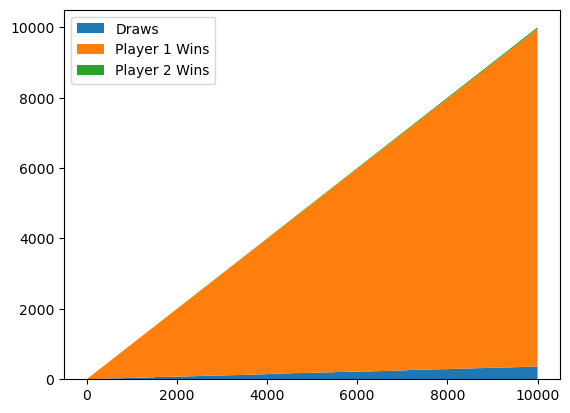

In [9]:
import matplotlib.pyplot as plt

# Create lists to store the cumulative number of games for each outcome
draws = []
p1_wins = []
p2_wins = []

# Iterate through the winners list and update the cumulative counts
cumulative_draws = 0
cumulative_p1_wins = 0
cumulative_p2_wins = 0
for i, winner in enumerate(winners):
    if winner == 0:
        cumulative_draws += 1
    elif winner == 1:
        cumulative_p1_wins += 1
    else:
        cumulative_p2_wins += 1
    draws.append(cumulative_draws)
    p1_wins.append(cumulative_p1_wins)
    p2_wins.append(cumulative_p2_wins)

# Create the stacked area chart
plt.stackplot(range(len(winners)), draws, p1_wins, p2_wins, labels=['Draws', 'Player 1 Wins', 'Player 2 Wins'])
plt.legend(loc='upper left')
plt.show()

In [30]:
# Compare states across policies
board=[1,0,2,2,1,0,0,0,0]

print("--- randomPolicy ---")
print(f"Policy keys: {len(randomPolicy)}")
print(f"Policy for empty board: {randomPolicy[tuple(getEmptyBoard())]}")
print(f"Board:")
showBoard(board)
print(f"Policy: {randomPolicy[tuple(board)]}")

print("\n\n--- perfectPolicy ---")
print(f"Policy keys: {len(perfectPolicy)}")
print(f"Policy for empty board: {perfectPolicy[tuple(getEmptyBoard())]}")
print(f"Board:")
showBoard(board)
print(f"Policy: {perfectPolicy[tuple(board)]}")

print("\n\n--- Q-table ---")
print(f"Policy keys: {len(Q)}")
print(f"Policy for empty board: {Q[tuple(getEmptyBoard())]}")
print(f"Board:")
showBoard(board)
print(f"Policy: {Q[tuple(board)]}")

print("\n\n--- ql_policy ---")
print(f"Policy keys: {len(ql_policy)}")
print(f"Policy for empty board: {ql_policy[tuple(getEmptyBoard())]}")
print(f"Board:")
showBoard(board)
print(f"Policy: {ql_policy[tuple(board)]}")

--- randomPolicy ---
Policy keys: 4520
Policy for empty board: [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
Board:
O · X
X O ·
· · ·

Policy: [0.2 0.2 0.2 0.2 0.2]


--- perfectPolicy ---
Policy keys: 4520
Policy for empty board: [0. 1. 0. 0. 0. 0. 0. 0. 0.]
Board:
O · X
X O ·
· · ·

Policy: [1. 0. 0. 0. 0.]


--- Q-table ---
Policy keys: 7291
Policy for empty board: [0.72618121 0.70658097 0.70971041 0.69657315 0.70742162 0.71489225
 0.72477746 0.7244331  0.70666476]
Board:
O · X
X O ·
· · ·

Policy: [0.79627961 0.89999914 0.         0.         0.83028126 0.8750583
 0.88577037 0.87935472 0.981     ]


--- ql_policy ---
Policy keys: 7291
Policy for empty board: [1. 0. 0. 0. 0. 0. 0. 0. 0.]
Board:
O · X
X O ·
· · ·

Policy: [0. 0. 0. 0. 1.]
